In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()



In [2]:
df=pd.read_csv('data/video_games_sales.csv').dropna()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
df.shape

(6825, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [7]:
df['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

## Quantitative

In [8]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
df.describe(include=object)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,6825,6825,6825,6825,6825,6825,6825
unique,4377,17,12,262,89,1289,7
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,7.8,EA Canada,T
freq,8,1140,1630,944,294,149,2377


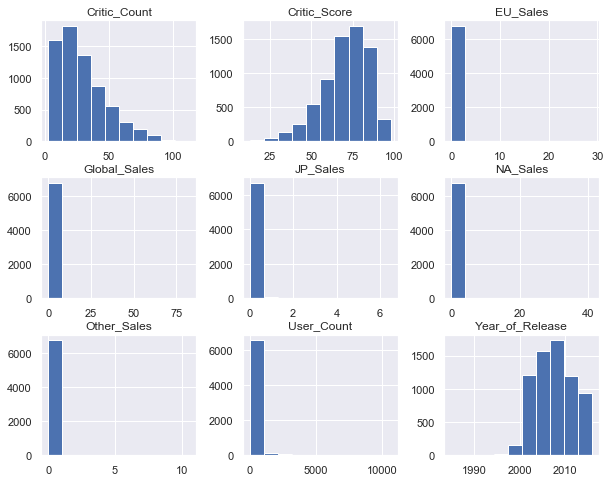

In [15]:
plt.rcParams['figure.figsize']=(10,8)
df.hist();

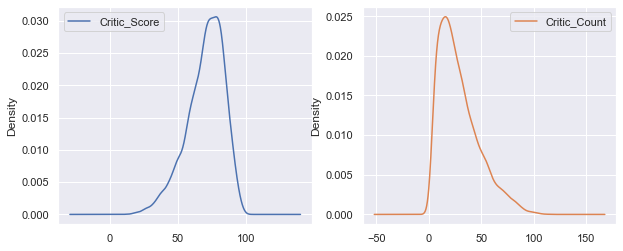

In [22]:
features=['Critic_Score','Critic_Count']
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));


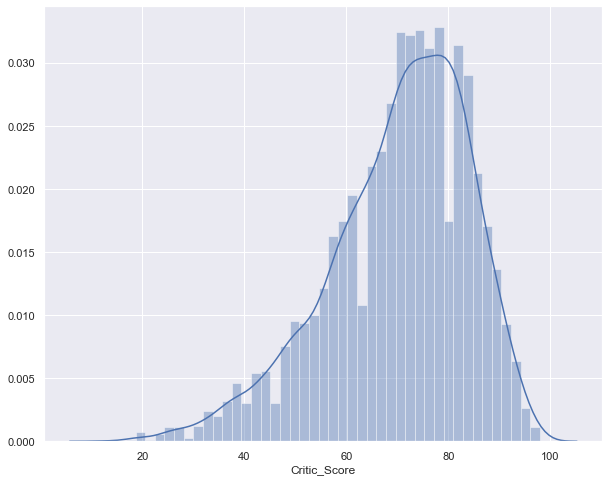

In [23]:
sns.distplot(df['Critic_Score']);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a281774a8>,
      dtype=object)

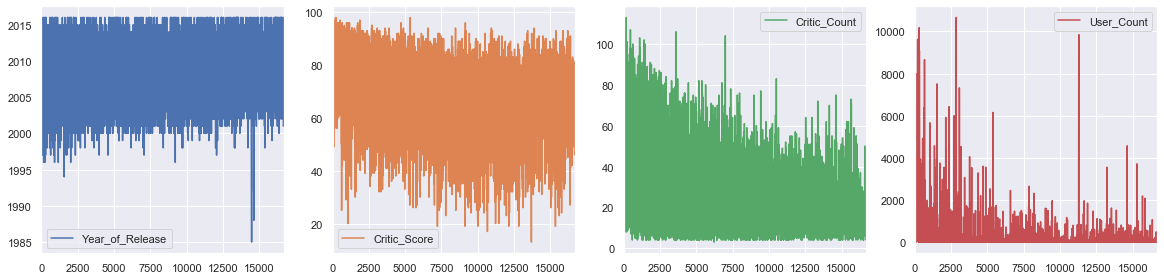

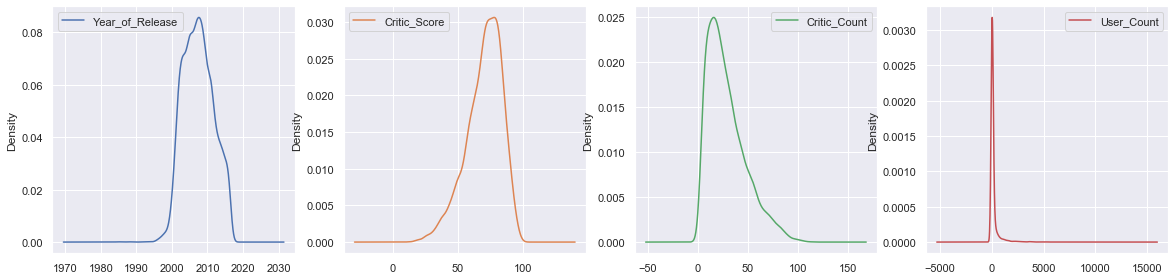

In [42]:
features=['Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count']

plt.rcParams['figure.figsize']=(20,10)

df[features].plot(kind='line', sharex=False, layout=(2,4), subplots=True )
df[features].plot(kind='density',sharex=False, layout=(2,4), subplots=True)

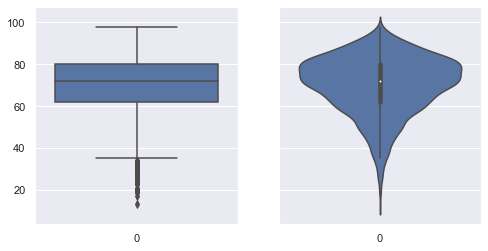

In [44]:
_, axes=plt.subplots(1,2,sharey=True,figsize=(8,4))
sns.boxplot(data=df['Critic_Score'],ax=axes[0])
sns.violinplot(data=df['Critic_Score'],ax=axes[1],xlabel='Critic_Score');

### Categorical

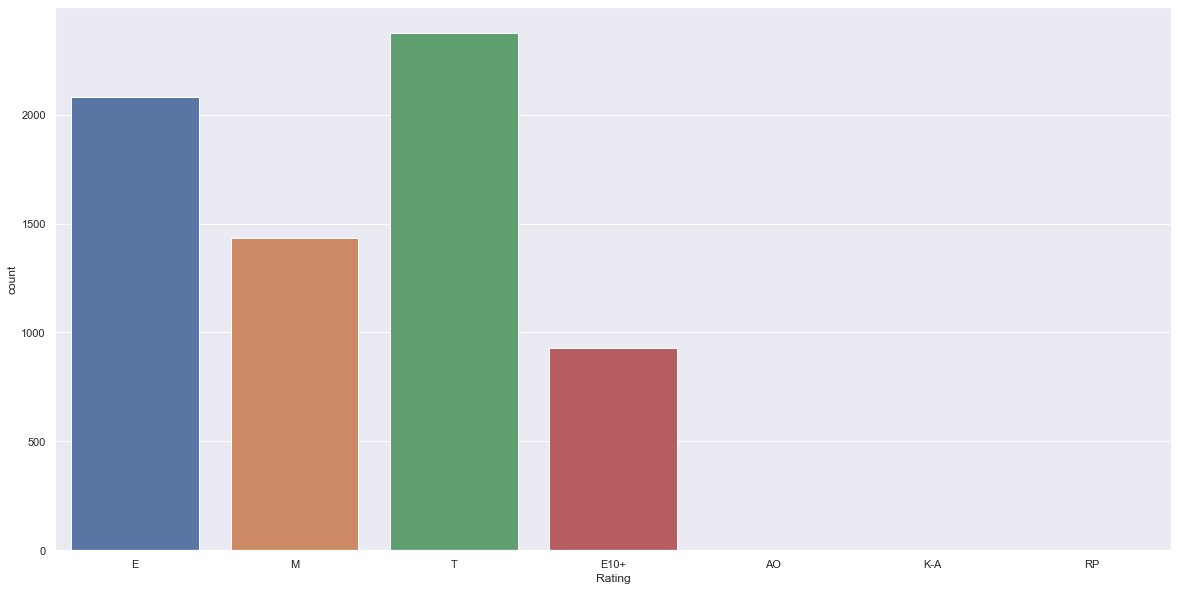

In [46]:
sns.countplot(x='Rating',data=df)

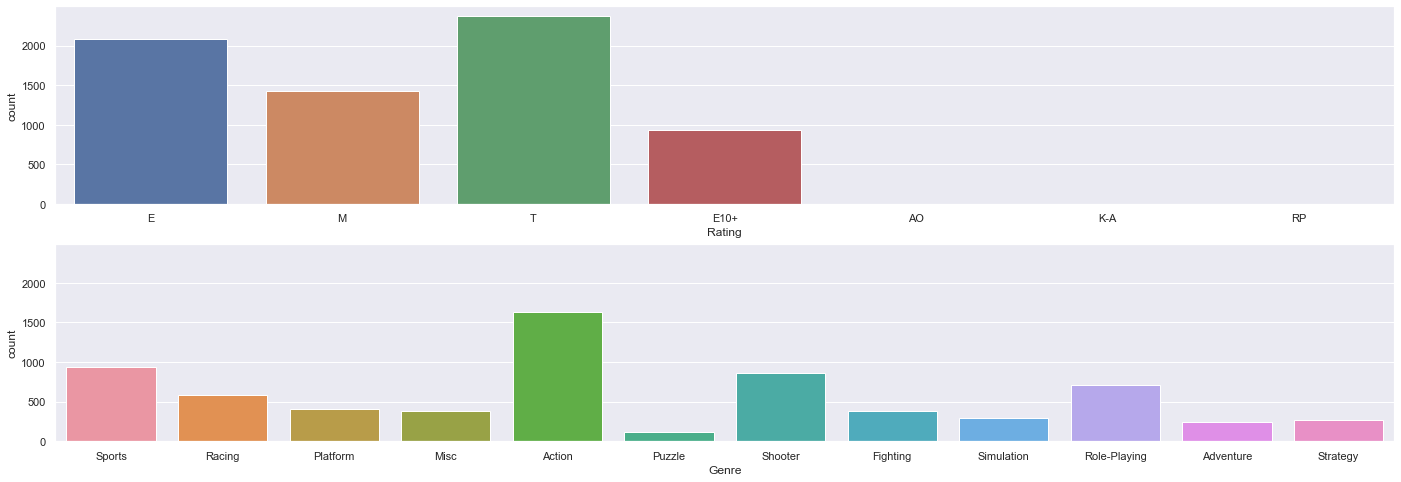

In [53]:
_, axes=plt.subplots(2,1,sharey=True,figsize=(24,8))
sns.countplot(x='Rating',data=df,ax=axes[0]);
sns.countplot(x='Genre',data=df,ax=axes[1]);

### Quantitative-Quantitative

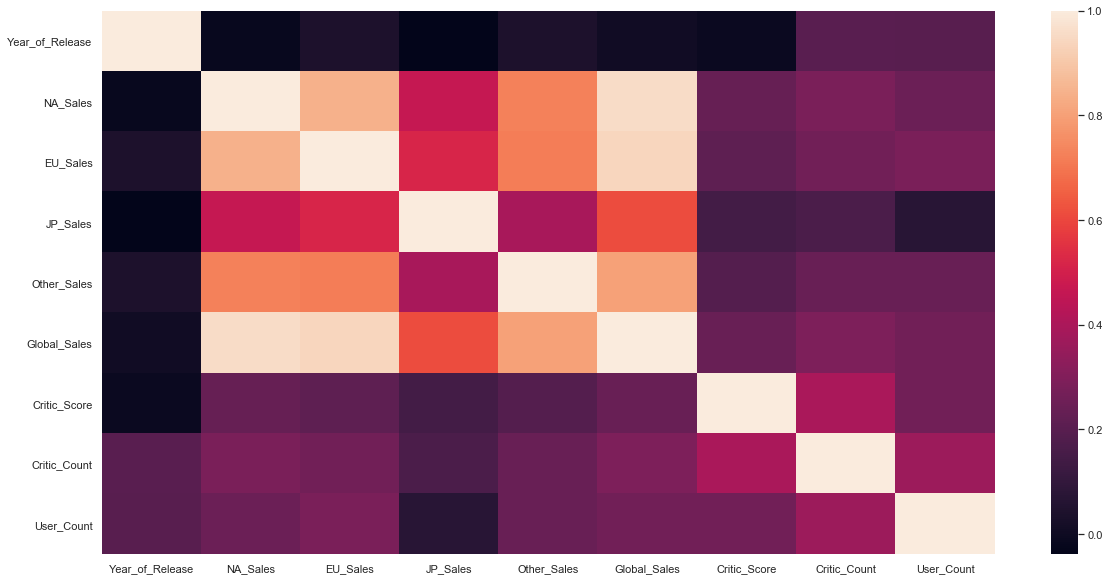

In [54]:
#Correlation matrix
corr=df.corr()

sns.heatmap(corr);

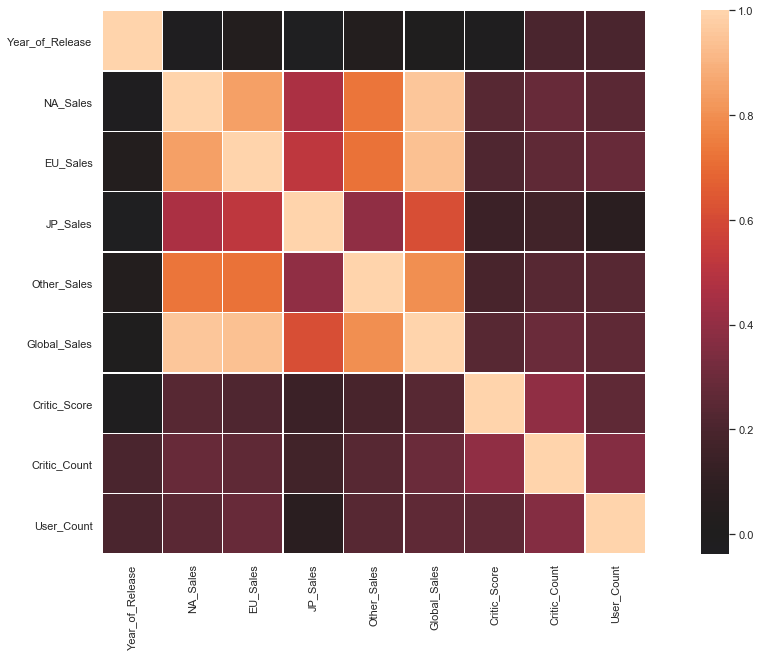

In [70]:
corr=df.corr(method='pearson')
sns.heatmap(
    corr,
    vmax=1,
    cmap=None,
    center=0,
    annot=None,
    fmt='.5f',
    linewidths=0.5,
    linecolor='white',
    square=True)

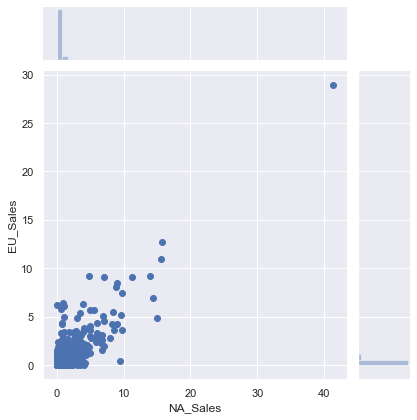

In [62]:
sns.jointplot(x='NA_Sales',y='EU_Sales',kind='scatter',data=df)

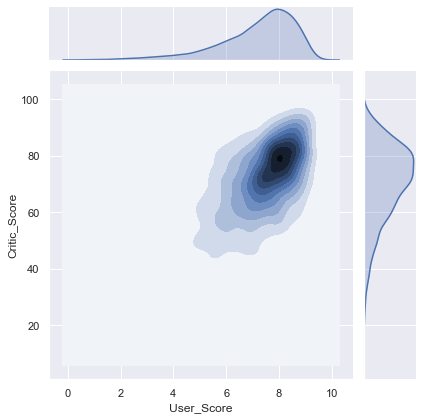

In [66]:
sns.jointplot(kind='kde',data=df,x='User_Score',y='Critic_Score');

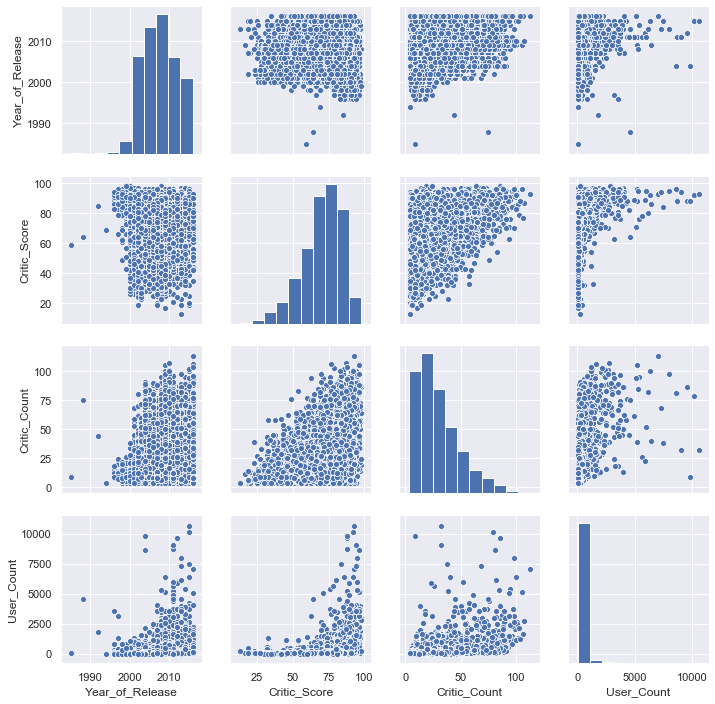

In [77]:
features=['Year_of_Release','Critic_Score','Critic_Count','User_Count']
sns.pairplot(df[features]);

### Quantitative-Categorical

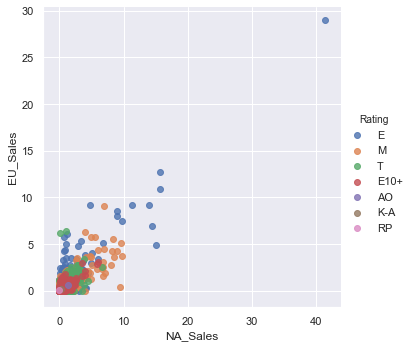

In [76]:
sns.lmplot('NA_Sales','EU_Sales',data=df, hue='Rating', fit_reg=False);


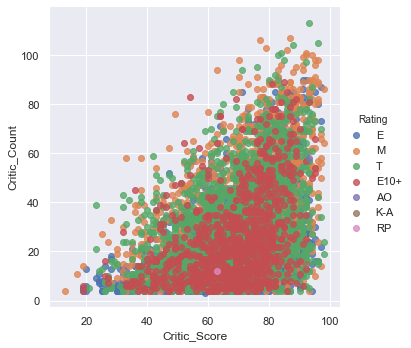

In [81]:
sns.lmplot('Critic_Score','Critic_Count',hue='Rating',data=df,fit_reg=False);

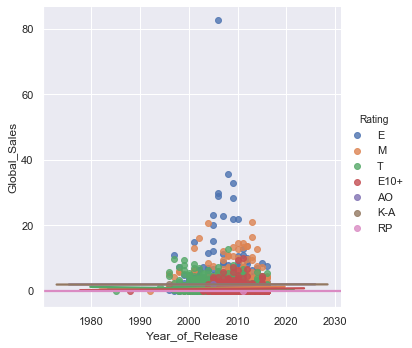

In [84]:
sns.lmplot('Year_of_Release','Global_Sales',hue='Rating',data=df,fit_reg=True);
#fit_reg will fit the model with vector for each rating